In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [119]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'],skiprows=1)
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [120]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [121]:
# для начала проверим , если ли отсутствующие значения
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [124]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <a list of 10 Patch objects>)

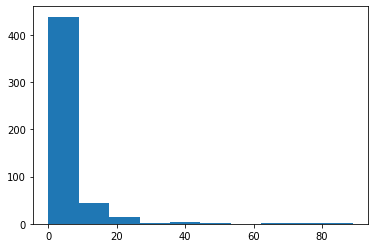

In [125]:
# 1 переменная CRIM(уровень преступности на душу населения) - безусловно важная переменная и ее мы точно оставляем
plt.hist(data['CRIM'])
# на основании частотного графика мы видим , что значения свыше 20 на выборку не повлияют , поэтому их уберем

In [126]:
data1 = data.loc[data.CRIM <= 20.00000]
data1.head()
data1.shape
# по результатам чистки первого столбца - убрали 18 строк и получили 488


(488, 14)

(array([354.,  12.,  48.,  16.,  13.,   6.,   4.,   6.,  19.,  10.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

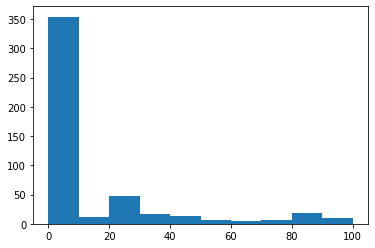

In [127]:
# 2 ZN(непонятная мне переменная даже из уст переводчика), поэтому оставим ее без изменений
plt.hist(data1['ZN'])

In [128]:
# 3 INDUS (доля площадей не для ретейла, то есть доля площадей под офисы для бизнеса), тоже важная величина ,
# так как это может влиять на то как быстро человек будет добираться до работы
data1['INDUS'].value_counts() # этого мало, построим график


18.10    114
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: INDUS, Length: 76, dtype: int64

(array([ 56.,  95.,  99.,  44.,  20.,   3., 114.,  45.,   0.,  12.]),
 array([ 0.46 ,  3.188,  5.916,  8.644, 11.372, 14.1  , 16.828, 19.556,
        22.284, 25.012, 27.74 ]),
 <a list of 10 Patch objects>)

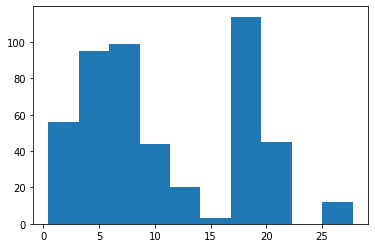

In [129]:
plt.hist(data1['INDUS'])
# по графику видно, что нет определенной закономерности для сортировки, поэтому столбец оставляем без изменений
# могу рпедположить , что столбец можем убрать


In [130]:
# удалим рассмотренный выше столбец
data1.drop(['INDUS'], axis=1, inplace=True)
data1.head() 

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [133]:
# 4 CHAS(где 1 = соседство с рекой, 0 = в обратном случае)так как здесь 2 возможных результата (0 или 1)
# посчитаем кол-во домов у реки и не у реки
data1['CHAS'].value_counts()
# в результате мы видим, что домов у реки всего лишь 35 (менее 10 % от общей выборки) - убираем
data4 = data1.loc[data.CHAS == 0]
data4.head()
data4.shape

(453, 13)

In [139]:
# 5 NOX(концентрация оксида азота) - есть подтверждения, что концентрация углекислого газа влияет на цену 
# недвижимости, а не концентрация оксида азота, поэтому удаляем столбец
#data4.drop(['NOX'], axis=1, inplace=True)
data4.head()

,CRIM,ZN,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


(array([  2.,   1.,  11.,  32., 152., 154.,  59.,  24.,  10.,   8.]),
 array([3.561 , 4.0774, 4.5938, 5.1102, 5.6266, 6.143 , 6.6594, 7.1758,
        7.6922, 8.2086, 8.725 ]),
 <a list of 10 Patch objects>)

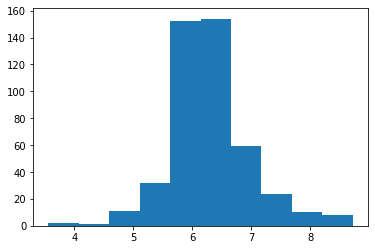

In [146]:
# 6 RM(среднее количество комнат) , безусловно важный параметр
data4['RM'].value_counts()
plt.hist(data4['RM']) # по графику видим нормальное распределение , оставим столбец без изменений

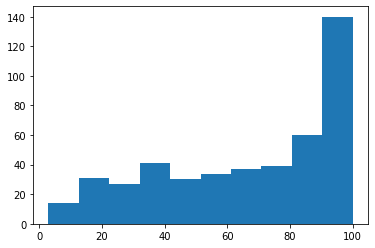

In [145]:
# 7 AGE(доля строений построенных до 1940 года)
data4['AGE'].value_counts()
plt.hist(data4['AGE'])# по графику видим, что от 0 до 80 идет примерно одинаковое кол-во, 
# поэтому сортировать не имеет смысла, и предположим что это не повлияет на стоимость домов
#(либо можем построить модель на новые и старые дома отдельно)


In [152]:
# data4.drop(['AGE'], axis=1, inplace=True)
data4.head()


,CRIM,ZN,CHAS,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,6.575,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,6.421,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,7.185,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,6.998,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,7.147,6.0622,3,222,18.7,396.90,5.33,36.2


(array([119., 105.,  71.,  56.,  45.,  26.,  19.,   7.,   4.,   1.]),
 array([ 1.137  ,  2.23595,  3.3349 ,  4.43385,  5.5328 ,  6.63175,
         7.7307 ,  8.82965,  9.9286 , 11.02755, 12.1265 ]),
 <a list of 10 Patch objects>)

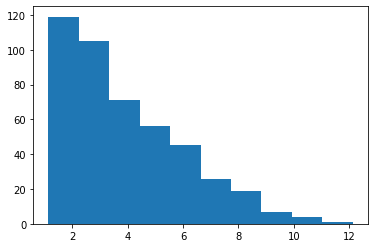

In [154]:
# 8 DIS(среднее растояние до 5 Бостонских центров занятости), тоже немаловажная величина
data4['DIS'].value_counts()
plt.hist(data4['DIS']) # оставляем без изменений

In [157]:
# 9 RAD(индекс доступности радиальных магистралей)тоже немаловажный параметр, оставляем
data4['RAD'].value_counts()

24    106
5     104
4     102
3      36
6      26
2      24
8      19
1      19
7      17
Name: RAD, dtype: int64

In [164]:
data4.loc[data4['RAD'].isin([1, 2, 3]), 'RAD'] = 2 # выберем среднее значение
data4.loc[data4['RAD'].isin([6, 7, 8]), 'RAD'] = 7 # выберем среднее значение
data4['RAD'].value_counts()


24    106
5     104
4     102
2      79
7      62
Name: RAD, dtype: int64

(array([ 50.,  89., 103.,  32.,  67.,   1.,   0.,   0.,   0., 111.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <a list of 10 Patch objects>)

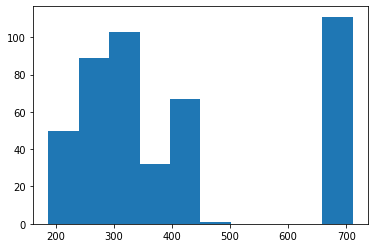

In [168]:
# 10 TAX(налоговая ставка на имущество), могу предположить что налоговая ставка не будет сильно влиять на цену недвижимости
data4['TAX'].value_counts()
plt.hist(data4['TAX'])

In [170]:
#data4.drop(['TAX'], axis=1, inplace=True)
data4.head() 

,CRIM,ZN,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,6.575,4.0900,2,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,6.421,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,7.185,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,6.998,6.0622,2,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,7.147,6.0622,2,18.7,396.90,5.33,36.2


(array([ 15.,   1.,  50.,  15.,  32.,  61.,  69.,  40., 152.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <a list of 10 Patch objects>)

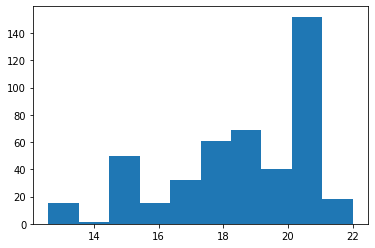

In [173]:
# 11 PTRATIO(соотношение учеников и учителей), важный показатель
data4['PTRATIO'].value_counts()
plt.hist(data4['PTRATIO'])# оставляем без изменений

(array([ 15.,   6.,   8.,   1.,   3.,   2.,   7.,  10.,  26., 375.]),
 array([3.20000e-01, 3.99780e+01, 7.96360e+01, 1.19294e+02, 1.58952e+02,
        1.98610e+02, 2.38268e+02, 2.77926e+02, 3.17584e+02, 3.57242e+02,
        3.96900e+02]),
 <a list of 10 Patch objects>)

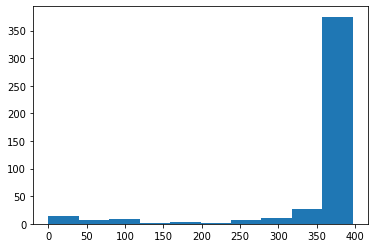

In [176]:
# 12 B(доля чернокожего населения) могу предположить, что этот показатель не важен(1 - это показывает график, 
# 2- недвижимость может приобретать как чернокожее население, так и другое), удаляем
data4['B'].value_counts()
plt.hist(data4['B'])

In [178]:
#data4.drop(['B'], axis=1, inplace=True)
data4.head() 

,CRIM,ZN,CHAS,RM,DIS,RAD,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,0,6.575,4.0900,2,15.3,4.98,24.0
1,0.02731,0.0,0,6.421,4.9671,2,17.8,9.14,21.6
2,0.02729,0.0,0,7.185,4.9671,2,17.8,4.03,34.7
3,0.03237,0.0,0,6.998,6.0622,2,18.7,2.94,33.4
4,0.06905,0.0,0,7.147,6.0622,2,18.7,5.33,36.2


(array([ 66., 103.,  92.,  75.,  59.,  23.,  16.,  12.,   3.,   4.]),
 array([ 1.73 ,  5.354,  8.978, 12.602, 16.226, 19.85 , 23.474, 27.098,
        30.722, 34.346, 37.97 ]),
 <a list of 10 Patch objects>)

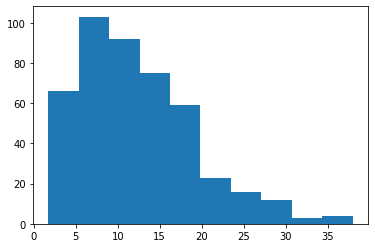

In [181]:
# 13 LSTAT(процент бедного населения) , важный показатель
data4['LSTAT'].value_counts()
plt.hist(data4['LSTAT']) # оставляем без изменений

In [184]:
# ранее предположил, что удаленность от реки не важна, но столбец не удалил
data4['CHAS'].value_counts() # так мы ранее удалили из выборки дома у реки, столбец не имеет смысла
#data4.drop(['CHAS'], axis=1, inplace=True)
data4.head() # итоговая выборка

,CRIM,ZN,RM,DIS,RAD,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,6.575,4.0900,2,15.3,4.98,24.0
1,0.02731,0.0,6.421,4.9671,2,17.8,9.14,21.6
2,0.02729,0.0,7.185,4.9671,2,17.8,4.03,34.7
3,0.03237,0.0,6.998,6.0622,2,18.7,2.94,33.4
4,0.06905,0.0,7.147,6.0622,2,18.7,5.33,36.2
